In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import comet_ml
from comet_ml import Experiment

In [3]:
import os
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, random_split
import pytorch_lightning as pl
from pytorch_lightning import Trainer
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.loggers import CometLogger

In [4]:
from manifoldembedder import *

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6,6)
plt.rcParams.update({'font.size': 14})

In [6]:
basedir = '/nobackup/users/sangeon/datasets/jetGridpack/jetpairs'


In [7]:
train_file_list = []
val_file_list = []
test_file_list = []
predict_file_list = []

basedir = '/nobackup/users/sangeon/datasets/jetGridpack/jetpairs'

for file in os.listdir(basedir):
    if "train" in file:
        train_file_list.append(os.path.join(basedir,file))
    elif "val" in file:
        val_file_list.append(os.path.join(basedir,file))
    elif "predict" in file:
        predict_file_list.append(os.path.join(basedir,file))
    elif "test" in file:
        test_file_list.append(os.path.join(basedir,file))

In [8]:
#train_file_list

In [9]:
predict_file_list

['/nobackup/users/sangeon/datasets/jetGridpack/jetpairs/taus_Gridpack_jetpair_predict_extrafeats.pickle',
 '/nobackup/users/sangeon/datasets/jetGridpack/jetpairs/Gridpack_jetpredict_16part_merged.pt',
 '/nobackup/users/sangeon/datasets/jetGridpack/jetpairs/taus_Gridpack_jetpair_predict.pt',
 '/nobackup/users/sangeon/datasets/jetGridpack/jetpairs/Gridpack_jetpair_predict_extrafeats.pickle',
 '/nobackup/users/sangeon/datasets/jetGridpack/jetpairs/Gridpack_jetpair_secondensemble_predict.pt',
 '/nobackup/users/sangeon/datasets/jetGridpack/jetpairs/interpolate_Gridpack_jetpair_predict.pt']

In [10]:
#train_list = []
#for file in train_file_list:
#    train_list.append(torch.load(file))
#jet_train = torch.utils.data.ConcatDataset(train_list)
#torch.save(jet_train, os.path.join(basedir, 'Gridpack_jettrain_16part_merged.pt'))

#val_list = []
#for file in val_file_list:
#    val_list.append(torch.load(file))
#jet_val = torch.utils.data.ConcatDataset(val_list)
#torch.save(jet_val, os.path.join(basedir, 'Gridpack_jetval_16part_merged.pt'))

#test_list = []
#for file in test_file_list:
#    test_list.append(torch.load(file))
#jet_test = torch.utils.data.ConcatDataset(test_list)
#torch.save(jet_test, f'/nobackup/users/sangeon/datasets/jets/concat_16p_test_temp.pt')

#predict_list = []
#for file in predict_file_list:
#    predict_list.append(torch.load(file))
#jet_predict = torch.utils.data.ConcatDataset(predict_list)
#torch.save(jet_predict, f'/nobackup/users/sangeon/datasets/jets/concat_predict_temp.pt')

In [11]:
file_dict = {'train':os.path.join(basedir, 'Gridpack_jettrain_16part_merged.pt'),
             'val':os.path.join(basedir, 'Gridpack_jetval_16part_merged.pt'),
             'test':None,
             'predict':os.path.join(basedir, 'Gridpack_jetpredict_16part_merged.pt')}

In [12]:
#file_dict = {'train':'/nobackup/users/sangeon/datasets/jets/jet_pair_train_temp.pt', 'val':'/nobackup/users/sangeon/datasets/jets/jet_pair_val_temp.pt','test':'/nobackup/users/sangeon/datasets/jets/jet_pair_test_temp.pt', 'predict':'/nobackup/users/sangeon/datasets/jets/concat_predict_temp.pt'}

In [13]:
#file_dict = {'train':'/nobackup/users/sangeon/datasets/jets/concat_triplet_train_temp.pt', 'val':'/nobackup/users/sangeon/datasets/jets/concat_triplet_val_temp.pt','test':'/nobackup/users/sangeon/datasets/jets/concat_triplet_test_temp.pt', 'predict':'/nobackup/users/sangeon/datasets/jets/concat_predict_temp.pt'}

# 16 particles

In [14]:
#file_dict = {'train':'/nobackup/users/sangeon/datasets/jets/concat_16p_train_temp.pt', 'val':'/nobackup/users/sangeon/datasets/jets/concat_16p_val_temp.pt','test':'/nobackup/users/sangeon/datasets/jets/concat_16p_test_temp.pt', 'predict':'/nobackup/users/sangeon/datasets/jets/jet_16p_predict_temp.pt'}

In [15]:
#dataset = torch.load('/nobackup/users/sangeon/datasets/jets/concat_train_temp.pt')

In [16]:
#jetpair_train = DataLoader(dataset, batch_size=10000,shuffle=True,num_workers=4)

# Paper

In [17]:
jet_dm = JetDataModule(file_dict,2000)
#jettriplet_dm = 

In [18]:
#emd = np.array([])
#for i,(_,_,dist) in enumerate(jetpair_train):
#    if i>100:
#        break
#    emd = np.concatenate([emd,dist.data.numpy()])

In [19]:
#emd

In [20]:
#plt.hist(emd)

In [21]:
#d_model, nhead, num_encoder_layers, num_decoder_layers, embed_dim, max_seq_length, pos_dropout, trans_dropout, layer_widths

In [22]:
#lr, npart, embed_dim, hidden_size, num_rnn_layers, layer_widths

In [38]:
#model = ManifoldEmbedder("jets",2,"Transformer", 0.00054607179632484, 32, 2 , 2, 2, 2, 8, 0.7,0.7, [500,300,10])
#model = ManifoldEmbedder("jets",3,"Transformer", 0.00054607179632484, 16, 4 , 2, 2, 2, 8, 0.7,0.7, [500,300,10])
#model = ManifoldEmbedder("jets",2,"Transformer", 0.00054607179632484, 32, 4 , 2, 2, 2, 8, 0.7,0.7, [500,300,10])
#model = ManifoldEmbedder("jets",2,"Transformer", 0.00054607179632484, [32, 4, 2, 2, 2, 16, 0.4,0.4, [1000,400,20,5]])

#model = ManifoldEmbedder("jets",2,"Transformer", 0.00054607179632484, [32, 4, 2, 2, 2, 16, 0.4,0.4, [1000,400,100]])

#model = ManifoldEmbedder("jets",2,"Transformer", 0.00054607179632484, [32, 4, 3, 2, 2, 16, 0.4,0.4, [1000,400,20,5]])
#model = ManifoldEmbedder("jets",2,"Transformer", 0.00054607179632484, [32, 4, 2, 2, 2, 16, 0.3,0.3, [1000,400,20,5]])


#next
model = ManifoldEmbedder("jets",2,"Transformer", 0.00054607179632484, [32, 4, 3, 2, 2, 16, 0.2,0.20, [1000,400,20]])

#model = ManifoldEmbedder("jets",2,"Transformer", 0.00054607179632484, [36, 4, 3, 2, 2, 16, 0.2,0.20, [1000,400,20]])


#[32,4,3,2,2,16,0.25,0.25,[1000,400,20]]
#model = ManifoldEmbedder("jets",2,"Transformer", 0.00054607179632484, 32, 8 , 4, 4, 2, 16, 0.75,0.75, [500,300,10])
#model = ManifoldEmbedder("jets",2,"Transformer", 0.00054607179632484, [16, 8 , 3, 3, 2, 16, 0.3,0.3, [100,50,50,10]])
#model = ManifoldEmbedder("jets",2,"Transformer", 0.00054607179632484, [16, 4 , 2, 2, 2, 16, 0.7,0.7, [500,300,10]])
#model = ManifoldEmbedder("jets",2,"Transformer", 0.00054607179632484, [32, 8 , 2, 2, 2, 16, 0.7,0.7, [500,300,10]])
#model = ManifoldEmbedder("jets",3, "Transformer", 0.00054607179632484, 32, 8 , 4, 4, 2, 8, 0.5,0.5, [1000,500,10])
#model = ManifoldEmbedder("jets",2,"MLP", 1e-2, 16, 2, [100,100,100,80,40,20,10])
#model = ManifoldEmbedder('jets',2,"GRU", 0.02089296130854041, 16, 2, 40, 40, [1000,500,10])


In [39]:
# Create an experiment with your api key
experiment = Experiment(
    api_key="CkkrVkSk6Vr2WKlbXIzlkhNlE",
    project_name="metricembedder",
)

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/sangeonpark/metricembedder/7ea28e03579f4080b57228c76c7dbc22
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     loss [1130]          : (0.30474188923835754, 3.9812278747558594)
COMET INFO:     train_loss [112]     : (0.31349924206733704, 0.7898732423782349)
COMET INFO:     val_loss_epoch       : 0.36953625082969666
COMET INFO:     val_loss_step [1250] : (0.17517854273319244, 0.6430878043174744)
COMET INFO:   Parameters:
COMET INFO:     backbone_type : Transformer
COMET INFO:     data_npair    : 2
COMET INFO:     data_type     : jets
COMET INFO:     learning_rate : 0.00054607179632484
COMET INFO:     modelparams   : [36, 4, 3, 2, 2, 16, 0.2, 0.2, [1000, 400, 20]]
COMET INFO:   Uploads:
COMET INFO:     environment details      : 1
COMET INFO:

In [40]:
comet_logger = CometLogger(
    api_key="CkkrVkSk6Vr2WKlbXIzlkhNlE",
    project_name="metricembedder",
)

CometLogger will be initialized in online mode


In [41]:
early_stop_callback = EarlyStopping(monitor="val_loss", min_delta=0.00, patience=5, verbose=False)

In [42]:
checkpoint_callback = ModelCheckpoint(
    monitor="val_loss",
    dirpath="/home/sangeon/ToyJetGenerator/training/simulatedtoyjets_checkpoints",
    filename="Transformer-paper-finaltuning-trywithp-{epoch:02d}-{val_loss:.2f}",
    save_top_k=4,
    mode="min",
)

In [43]:
trainer = Trainer(gpus=1,callbacks=[PrintCallbacks(),early_stop_callback,checkpoint_callback],logger=comet_logger,auto_lr_find=True)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


Starting to init trainer!
Trainer is init now


In [44]:
#trainer.tune(model, jetpair_dm)

In [45]:
lr_finder = trainer.tuner.lr_find(model, jet_dm)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Set SLURM handle signals.


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

/nobackup/users/sangeon/condas/anaconda3/envs/studies/lib/python3.8/site-packages/pytorch_lightning/core/datamodule.py:469: LightningDeprecationWarning: DataModule.teardown has already been called, so it will not be called again. In v1.6 this behavior will change to always call DataModule.teardown.
  rank_zero_deprecation(
Restoring states from the checkpoint path at /home/sangeon/ToyJetGenerator/training/lr_find_temp_model_1b93413e-70ec-49e9-be5e-33e7af870b32.ckpt


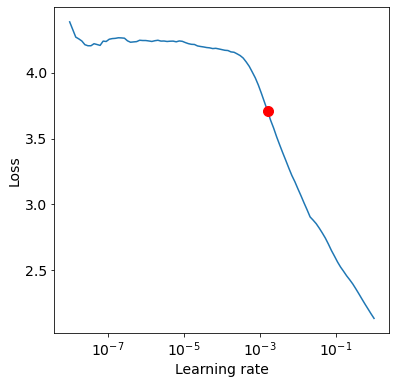

In [46]:
fig = lr_finder.plot(suggest=True)
fig.show()

In [47]:
new_lr = lr_finder.suggestion()

In [48]:
new_lr

0.001584893192461114

In [49]:
model.hparams.learning_rate = new_lr

In [50]:
model.learning_rate = new_lr

In [51]:
model.learning_rate

0.001584893192461114

In [ ]:
trainer.fit(model, jet_dm)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/sangeonpark/metricembedder/539d015722174d3e8311b7e632bd8955
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     loss [20] : (0.6478317975997925, 4.530745506286621)
COMET INFO:   Uploads:
COMET INFO:     environment details      : 1
COMET INFO:     filename                 : 1
COMET INFO:     git metadata             : 1
COMET INFO:     git-patch (uncompressed) : 1 (8.60 MB)
COMET INFO:     installed packages       : 1
COMET INFO:     model graph              : 1
COMET INFO:     notebook                 : 1
COMET INFO:     source_code              : 1
COMET INFO: ---------------------------
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finis

Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

In [38]:
os.getcwd()

'/home/sangeon/ToyJetGenerator/training'

In [44]:
#checkpoint = torch.load("./simulatedtoyjets_checkpoints/Transformer-paper-v0-checkpoint-epoch=01-val_loss=0.48.ckpt")

In [45]:
#print(checkpoint["hyper_parameters"])

{'data_type': 'jets', 'data_npair': 2, 'backbone_type': 'Transformer', 'learning_rate': 0.002754228703338169, 'modelparams': [16, 8, 3, 3, 2, 16, 0.3, 0.3, [100, 50, 50, 10]]}


In [88]:
model = ManifoldEmbedder.load_from_checkpoint("./simulatedtoyjets_checkpoints/Transformer-paper-finaltuning-try6-epoch=00-val_loss=0.28.ckpt")

In [89]:
model.eval()

ManifoldEmbedder(
  (encoder): particleTransformer(
    (embed_src): Linear(in_features=3, out_features=32, bias=True)
    (embed_tgt): Linear(in_features=3, out_features=32, bias=True)
    (pos_enc): PositionalEncoding(
      (dropout): Dropout(p=0.25, inplace=False)
    )
    (transformer_encoder): TransformerEncoder(
      (layers): ModuleList(
        (0): TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): _LinearWithBias(in_features=32, out_features=32, bias=True)
          )
          (linear1): Linear(in_features=32, out_features=2048, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=2048, out_features=32, bias=True)
          (norm1): LayerNorm((32,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((32,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
        )
        (1): Tra

In [90]:
#predictloader = jet_dm.predict_dataloader()

In [91]:
#for temp in predictloader:
#    print(temp[0][0])

In [133]:
a = trainer.predict(model, jet_dm)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/sangeonpark/metricembedder/e6c59bf2639d4bab96dce32b2704c69b



Predicting: 4360it [00:00, ?it/s]

COMET INFO: -----------------------------------
COMET INFO: Comet.ml ExistingExperiment Summary
COMET INFO: -----------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/sangeonpark/metricembedder/e6c59bf2639d4bab96dce32b2704c69b
COMET INFO:   Parameters:
COMET INFO:     backbone_type : Transformer
COMET INFO:     data_npair    : 2
COMET INFO:     data_type     : jets
COMET INFO:     learning_rate : 0.00054607179632484
COMET INFO:     modelparams   : [32, 4, 3, 2, 2, 16, 0.1, 0.1, [1000, 400, 20]]
COMET INFO:   Uploads:
COMET INFO:     model graph : 1
COMET INFO: -----------------------------------
COMET INFO: Uploading 1 metrics, params and output messages


In [93]:
label = np.array([])
embedding = np.empty((0,2))
for batch in a:
    #print(batch[0].shape)
    #print(batch[1].shape)
    embedding = np.vstack((embedding, batch[0].cpu().numpy()))
    label = np.concatenate([label, batch[1].cpu().numpy()])
    #print(batch[0], batch[1])

In [94]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6,6)
plt.rcParams.update({'font.size': 14})

In [95]:
embedding[label==2]

array([[ 0.42518386, -0.03326859],
       [ 0.19865333, -0.33511737],
       [ 0.21995671, -0.25450912],
       ...,
       [ 0.16656287, -0.22941685],
       [ 0.32662559, -0.23169684],
       [ 0.35969192, -0.02781977]])

In [96]:
embedding[label==4]

array([[ 0.33668268, -0.45094818],
       [ 0.22473666, -0.31320703],
       [ 0.22302836, -0.31334969],
       ...,
       [ 0.30878434, -0.43022102],
       [ 0.22237667, -0.21730265],
       [ 0.18537551, -0.28153419]])

In [97]:
embedding[label==3]

array([[ 0.16886561, -0.08481875],
       [ 0.15707764, -0.18398567],
       [ 0.1655817 , -0.06241349],
       ...,
       [ 0.17614082, -0.19236015],
       [ 0.17724618, -0.10121676],
       [ 0.16512215, -0.12137015]])

In [98]:
embedding[label==1]

array([[ 0.16874892, -0.12406537],
       [ 0.15486681, -0.18778953],
       [ 0.17031813, -0.07134043],
       ...,
       [ 0.16611174, -0.10959926],
       [ 0.16962491, -0.07842286],
       [ 0.16996887, -0.07051979]])

In [99]:
namelist = ['QCD','2p25','2p170','3p25','3p170','4p170','4p400']

Text(0.5, 1.0, 'Simulated Jet Embedding')

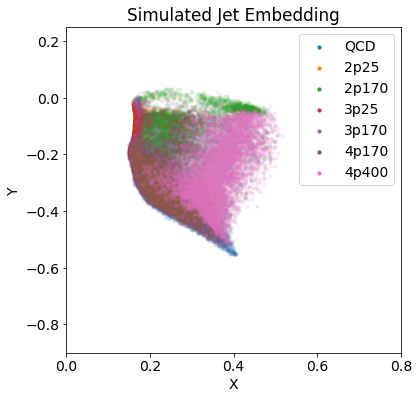

In [106]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
for i in range(7):
    ax.scatter(embedding[label==i][:10000,0],embedding[label==i][:10000,1],s=10,alpha=0.10,label=namelist[i])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim([0,0.8])
ax.set_ylim([-0.9,0.25])
leg = ax.legend()
for lh in leg.legendHandles: 
    lh.set_alpha(1)
    
ax.set_title('Simulated Jet Embedding')    
#fig.savefig(f'../figures/paper/embedding_simulated_toyjet_v1.png')    
#fig.savefig(f'../figures/paper/embedding_simulated_toyjet_v1.pdf')

Text(0.5, 1.0, 'Simulated Jet Embedding')

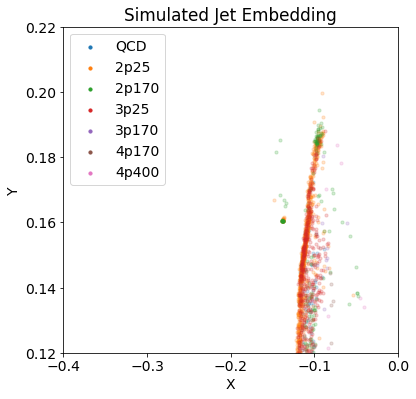

In [49]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
for i in range(7):
    ax.scatter(embedding[label==i][:1000,0],embedding[label==i][:1000,1],s=10,alpha=0.20,label=namelist[i])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim([-0.4,0.0])
ax.set_ylim([0.12,0.22])
leg = ax.legend()
for lh in leg.legendHandles: 
    lh.set_alpha(1)
    
ax.set_title('Simulated Jet Embedding')    
#fig.savefig(f'../figures/paper/embedding_simulated_toyjet_v1.png')    
#fig.savefig(f'../figures/paper/embedding_simulated_toyjet_v1.pdf')

In [38]:
embedding[label==1][:1000].shape

(1000, 2)

In [39]:
from scipy import stats

def plot_kde(ax, whichlabel, color):
    #xmin = embedding[label==whichlabel][:,0].min()
    #xmax = embedding[label==whichlabel][:,0].max()
    #ymin = embedding[label==whichlabel][:,1].min()
    #ymax = embedding[label==whichlabel][:,1].max()
    xmin, xmax = [-0.5,0.3]
    ymin, ymax = [0,0.35]
    X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([X.ravel(), Y.ravel()])
    kernel = stats.gaussian_kde(embedding[label==whichlabel][:10000].T)
    Z = np.reshape(kernel(positions).T, X.shape)
    Z /= Z.max()
    print(Z.max(),Z.min())
    #ax.imshow(np.rot90(Z),cmap='Blues' , extent=[xmin, xmax, ymin, ymax])
    CS = ax.contour(X,Y,Z,levels=[0.3,0.6],colors=color, alpha=0.8)
    #ax.contour(X,Y,Z,levels=1,colors=color)
    return CS


1.0 0.0
1.0 0.0
1.0 0.0
1.0 0.0
1.0 0.0
1.0 0.0
1.0 0.0


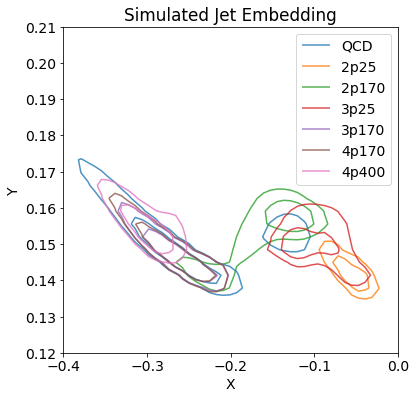

In [74]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
####ax.scatter(embedding[label==0][:50,0],embedding[label==0][:50,1],s=200,alpha=0.1,label='0')
####ax.scatter(embedding[label==1][:50,0],embedding[label==1][:50,1],s=200,alpha=0.1,label='1')
#ax.scatter(embedding[label==2][:100,0],embedding[label==2][:100,1],s=200,alpha=0.1,label='2')
#ax.scatter(embedding[label==3][:100,0],embedding[label==3][:100,1],s=200,alpha=0.1,label='3')
#ax.scatter(embedding[label==4][:100,0],embedding[label==4][:100,1],s=200,alpha=0.1,label='4')
####ax.scatter(embedding[label==5][:50,0],embedding[label==5][:50,1],s=200,alpha=0.1,label='5')
####ax.scatter(embedding[label==6][:50,0],embedding[label==6][:50,1],s=200,alpha=0.1,label='6')
#ax.scatter(embedding[label==7][:100,0],embedding[label==7][:100,1],s=200,alpha=0.1,label='7')
#ax.scatter(embedding[label==8][:100,0],embedding[label==8][:100,1],s=200,alpha=0.1,label='8')
####ax.scatter(embedding[label==9][:50,0],embedding[label==9][:50,1],s=200,alpha=0.1,label='9')
#ax.imshow(np.rot90(Z),cmap='Blues' , extent=[xmin, xmax, ymin, ymax])
lines = []
for i in range(7):
    CS = plot_kde(ax, i, f'C{i}')
    lines.append(CS.collections[0])
#plot_kde(ax, 1,'C0')
#plot_kde(ax, 2,'C1')
#plot_kde(ax, 3,'C2')
#plot_kde(ax, 4,'C3')

#print(ax.collections[0].get_color()=='C0')
#print(ax.collections[0].set_label("QCD"))
#print(ax.collections[4].set_label("twoprong"))
#print(ax.collections[6].set_label("threeprong"))
#print(ax.collections[10].set_label("fourprong"))

#for i in range(7)

#lines = [ CS_list[0].collections[0], CS_list[1].collections[0], CS_list[2].collections[0], CS_list[0].collections[0],CS_list[0].collections[0],CS_list[0].collections[0],CS_list[0].collections[0]]
#labels = ['CS1_neg','CS1_pos','CS2_neg','CS2_pos']
#plt.legend(lines, labels)
#print(ax.collections[1].get_color()=='C0')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim([-0.4,0.0])
ax.set_ylim([0.12,0.21])
ax.legend(lines, namelist)
ax.set_title('Simulated Jet Embedding')    
fig.savefig(f'../figures/paper/embedding_simulatedtoyjet_smoothed_v1.png')
fig.savefig(f'../figures/paper/embedding_simulatedtoyjet_smoothed_v1.pdf')

(-100.0, 100.0)

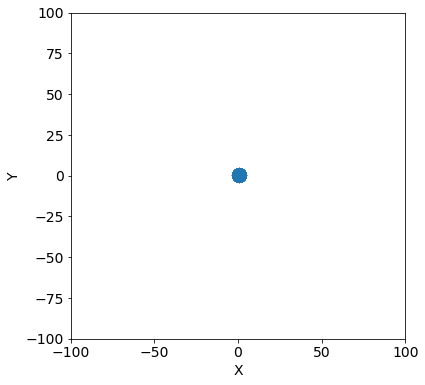

In [101]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
#ax.scatter(embedding[label==0][:1000,0],embedding[label==0][:1000,1],s=200,alpha=0.05)
ax.scatter(embedding[label==1][:100,0],embedding[label==1][:100,1],s=200,alpha=0.05)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim(-100,100)
ax.set_ylim(-100,100)
#fig.savefig(f'{path}/{name}.png')

In [42]:
embedding[label==0]

array([[34.16513062, -1.49830151],
       [34.1387825 , -1.53783011],
       [34.53158569, -0.93025315],
       ...,
       [34.1339798 , -1.54286742],
       [30.40222168,  5.07749081],
       [34.23294067, -1.4946003 ]])

In [43]:
embedding[label==1]

array([[34.15142822, -1.52005196],
       [34.01434708, -1.64321101],
       [34.10200119, -1.60349095],
       ...,
       [34.09588623, -1.59495401],
       [34.40365982, -1.46968496],
       [34.20943451, -1.48509216]])

In [41]:
label

array([0., 0., 0., ..., 1., 1., 1.])

In [ ]:
experiment.end()

In [ ]:
import tensorboard

In [11]:
%load_ext tensorboard